# El corpus iris

El corpus iris ha sido ampliamente utilizado para introducir conceptos y métodos básicos de aprendizaje automático. Consta de $N=150$ muestras, $50$ por cada una de $C=3$ clases, representadas mediante vectores de $D=4$ características reales homogéneas. Una de las clases es linealmente separable del resto, pero las otras dos no son linealmente separables. Aunque hoy en día se considera un corpus de "juguete", sigue siendo muy útil para introducir conceptos y métodos básicos.

Primero importamos algunas librerías estándar i sklearn:

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_iris

Lectura del corpus iris:

In [2]:
iris = load_iris()
print(dir(iris))
X = iris.data 
y = iris.target
fn = iris.feature_names
cn = iris.target_names
print(iris.DESCR)

['DESCR', 'data', 'data_module', 'feature_names', 'filename', 'frame', 'target', 'target_names']
.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ==========

<p style="page-break-after:always;"></p>

Convertimos el corpus en un dataframe pandas para facilitar su descripción:

In [ ]:
data = pd.DataFrame(data=X, columns=fn)
data['species'] = pd.Series(iris.target_names[y], dtype='category')
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


<p style="page-break-after:always;"></p>

Veamos algunas estadísticas básicas:

In [4]:
data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Comprobamos que tenemos $50$ muestras de cada clase:

In [5]:
data.groupby('species',observed=True).size()

species
setosa        50
versicolor    50
virginica     50
dtype: int64

<p style="page-break-after:always;"></p>

Dado que tenemos pocas características, es buena idea hacer un gráfico matricial de dispersión:

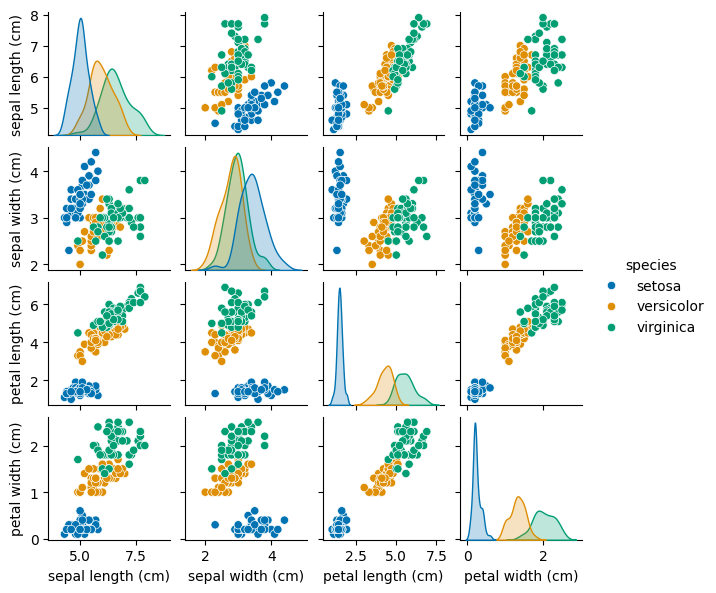

In [6]:
sns.pairplot(data, hue="species", height = 1.5, palette = 'colorblind');

**Cuestión:** ¿Qué clase se separa linealmente de las otras dos?

Se hace evidente al visualizar el gráfico matricial que la clase `setosa` puede separarse linealmente de las otras dos. Además se puede apreciar que las caractarísticas con mayor correlación de clase son `petal witdth` y `petal length`, apreciable en los gráficos de distribución de las características (diagonal)